In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("train_data.csv",sep=";")

In [6]:
data.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,True,2017-04-24,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,True,2017-07-27,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,True,2017-02-03,0.276


In [7]:
data.shape

(251155, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251155 entries, 0 to 251154
Data columns (total 9 columns):
origin_latitude          251155 non-null float64
origin_longitude         251155 non-null float64
destination_latitude     251155 non-null float64
destination_longitude    251155 non-null float64
weight                   251155 non-null float64
loading_meters           251155 non-null float64
is_adr                   251155 non-null bool
shipping_date            251155 non-null object
cost                     251155 non-null float64
dtypes: bool(1), float64(7), object(1)
memory usage: 15.6+ MB


In [9]:
data.describe()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,cost
count,251155.000000,251155.000000,251155.000000,251155.000000,251155.000000,251155.000000,251155.000000
mean,25.698019,108.928965,25.583530,108.969093,0.405943,0.167496,0.343925
std,1.783849,2.086520,1.983605,2.297844,0.127647,0.063195,0.129915
min,21.710000,102.970000,21.650000,103.000000,0.050000,0.000000,0.017000
25%,24.310000,107.340000,23.780000,107.180000,0.328000,0.195000,0.249000
50%,25.650000,108.890000,25.640000,109.400000,0.475000,0.195000,0.333000
75%,26.910000,110.460000,27.170000,110.750000,0.490000,0.195000,0.415000
max,30.220000,114.210000,30.400000,114.250000,1.000000,0.995000,2.349000


In [10]:
data.isnull().sum()

origin_latitude          0
origin_longitude         0
destination_latitude     0
destination_longitude    0
weight                   0
loading_meters           0
is_adr                   0
shipping_date            0
cost                     0
dtype: int64

In [11]:
data["is_adr"] = data["is_adr"].astype(int)


In [12]:
data.drop("shipping_date", axis=1, inplace=True)

In [13]:
data.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,1,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,1,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,1,0.276


In [14]:
data.corr()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,cost
origin_latitude,1.000000,0.141741,0.027201,-0.012531,0.005787,-0.077565,NaN,0.035691
origin_longitude,0.141741,1.000000,0.097723,0.112161,-0.167042,-0.092156,NaN,0.001075
destination_latitude,0.027201,0.097723,1.000000,0.226907,-0.024997,0.045922,NaN,0.073673
destination_longitude,-0.012531,0.112161,0.226907,1.000000,0.014606,0.028057,NaN,0.040892
weight,0.005787,-0.167042,-0.024997,0.014606,1.000000,-0.282942,NaN,-0.051613
loading_meters,-0.077565,-0.092156,0.045922,0.028057,-0.282942,1.000000,NaN,0.048427
is_adr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost,0.035691,0.001075,0.073673,0.040892,-0.051613,0.048427,NaN,1.000000


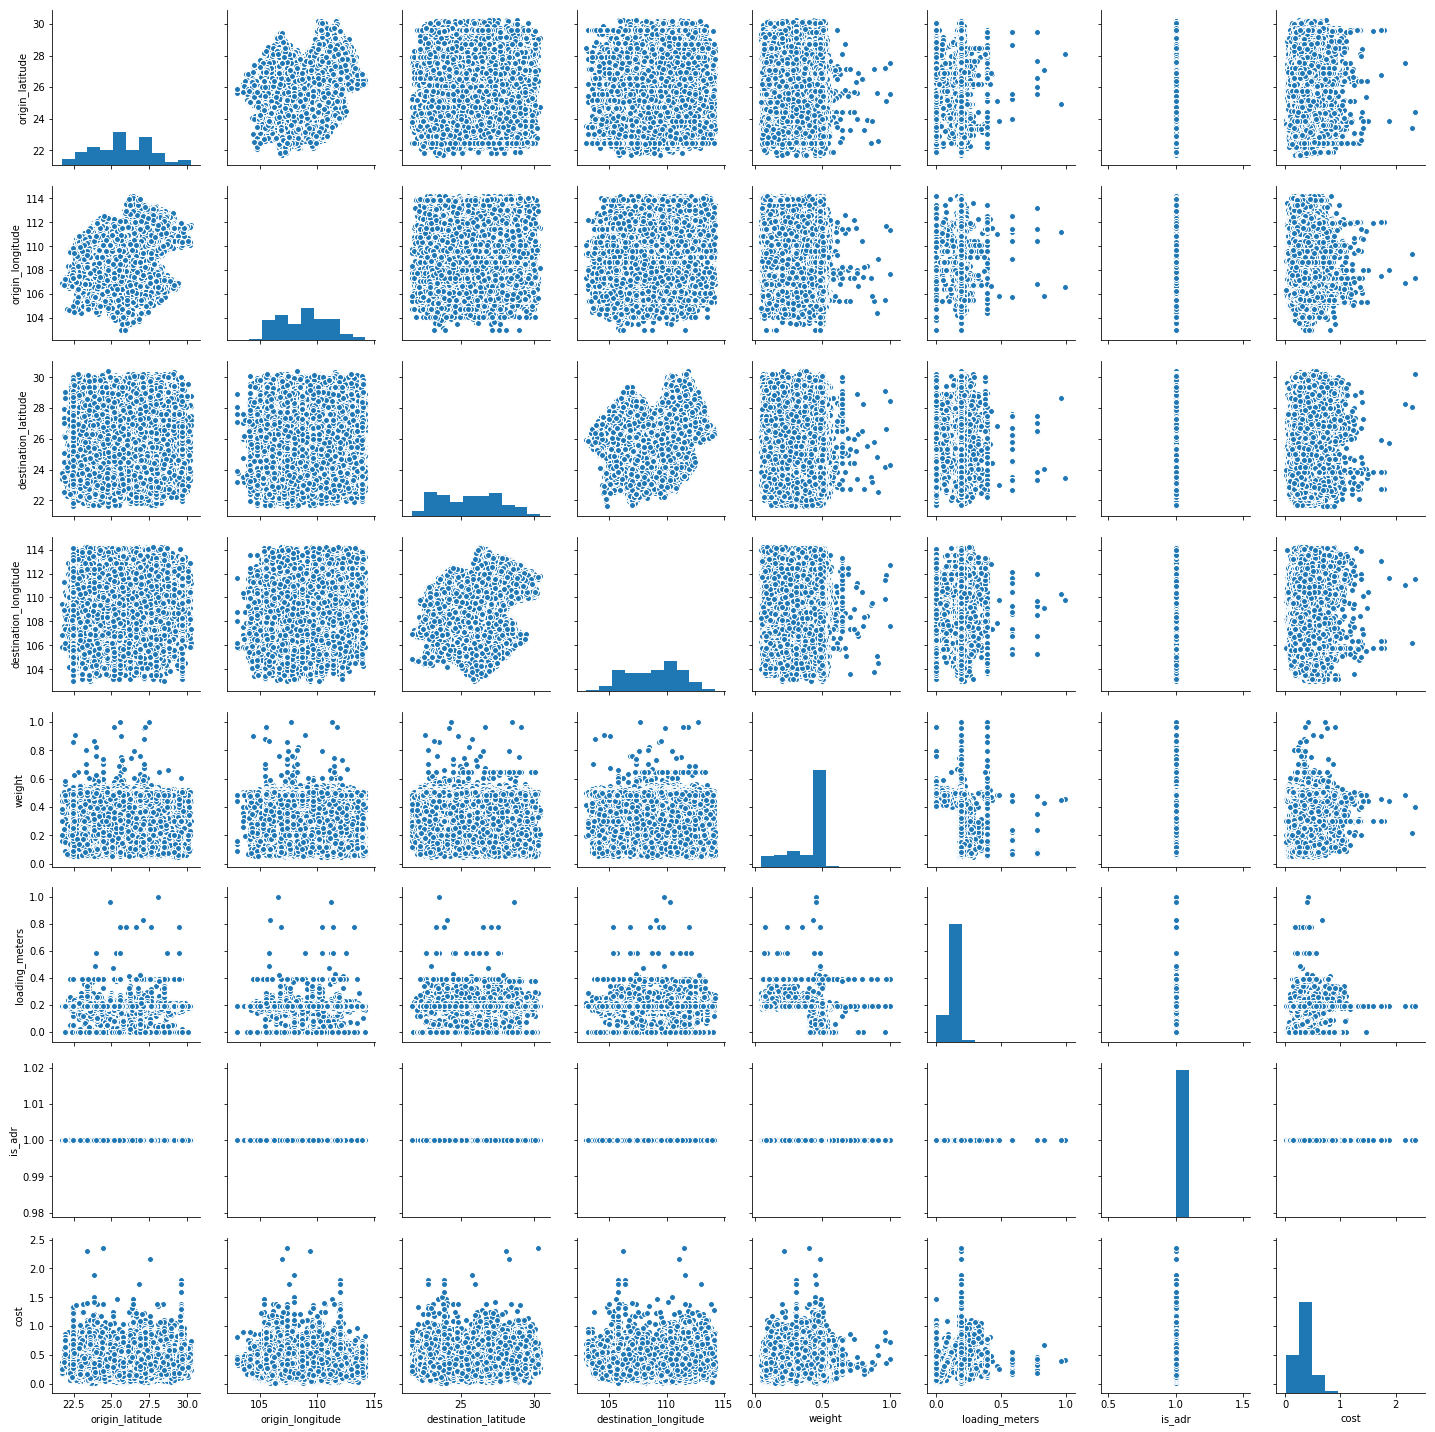

In [15]:
sns.pairplot(data)


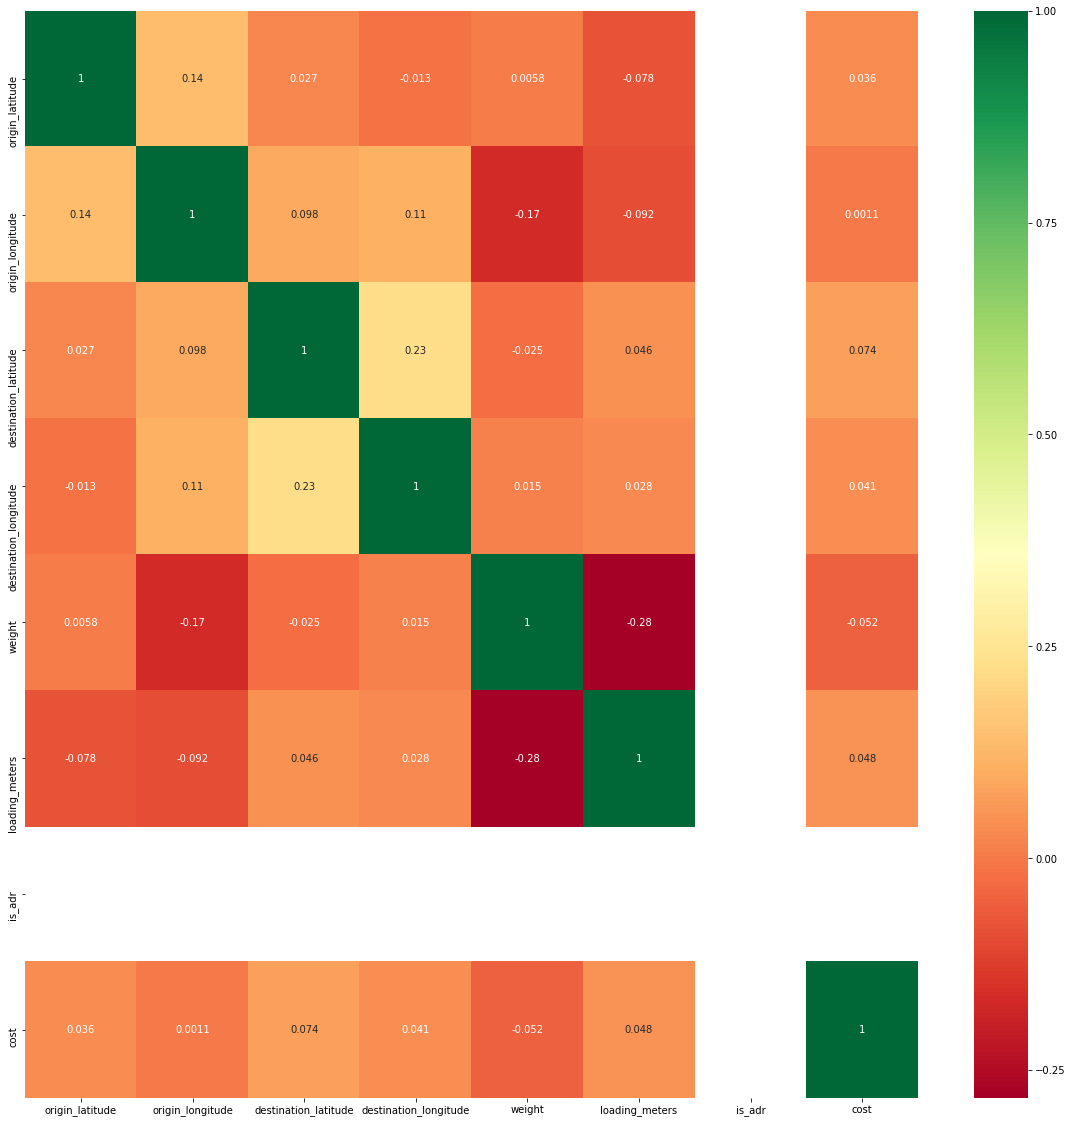

In [17]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
X = data.iloc[:,:-1]

In [19]:
X.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr
0,27.22,105.59,26.91,108.67,0.513,0.195,1
1,25.00,109.79,25.34,108.59,0.484,0.195,1
2,27.10,105.60,29.35,106.54,0.484,0.195,1


In [20]:
y=data.iloc[:,-1]

In [21]:
y.head(3)

0    0.247
1    0.248
2    0.276
Name: cost, dtype: float64

In [22]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
print(model.feature_importances_)


[0.19355937 0.24964462 0.18228331 0.20221461 0.06836874 0.10392935
 0.        ]


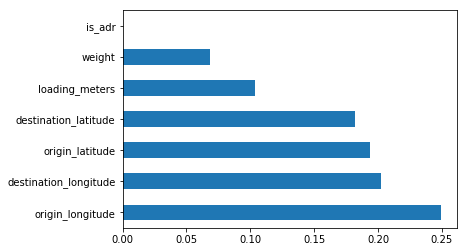

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [28]:
regressor=RandomForestRegressor()

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [30]:
from sklearn.model_selection import RandomizedSearchCV


In [31]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
rf = RandomForestRegressor()

In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.5min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.3min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.3min
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 3.3min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.1min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.1min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  58.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 446.3min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [37]:
rf_random.best_params_


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [38]:
rf_random.best_score_


-0.003023369529737148

In [39]:
predictions=rf_random.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


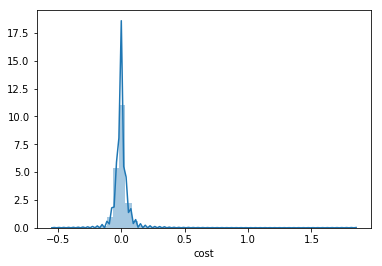

In [40]:
sns.distplot(y_test-predictions)


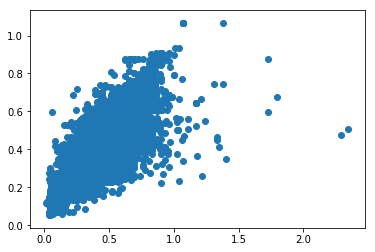

In [41]:
plt.scatter(y_test,predictions)


In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.03212248952001395
MSE: 0.002987967834172978
RMSE: 0.054662307252557295


In [44]:
print("R2 score:",metrics.r2_score(y_test, predictions))

R2 score: 0.821891564063806


In [46]:
new_model = RandomForestRegressor(max_depth= 20,max_features='auto',
 min_samples_leaf= 1,
 min_samples_split= 15,
 n_estimators= 700)

In [47]:
new_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
my_new_preds = new_model.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, my_new_preds))
print('MSE:', metrics.mean_squared_error(y_test, my_new_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, my_new_preds)))
print("R2 score:",metrics.r2_score(y_test, my_new_preds))

MAE: 0.03211730196238043
MSE: 0.0029858347947600947
RMSE: 0.05464279270645027
R2 score: 0.8220187114545088
